In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
X_test.shape


(10000, 28, 28)

In [ ]:
single_image= X_train[0]


In [ ]:
single_image.shape


(28, 28)

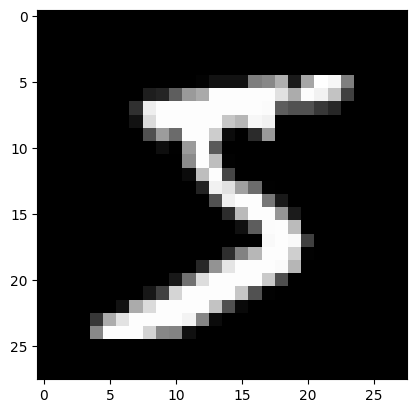

In [ ]:
plt.imshow(single_image,cmap='gray')


In [ ]:
y_train.shape


(60000,)

In [ ]:
X_train.min()


0

In [ ]:
X_train.max()


255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()



0.0

In [ ]:
X_train_scaled.max()


1.0

In [ ]:
y_train[0]


5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)


numpy.ndarray

In [ ]:
y_train_onehot.shape


(60000, 10)

SRIRAM S 
212222240105


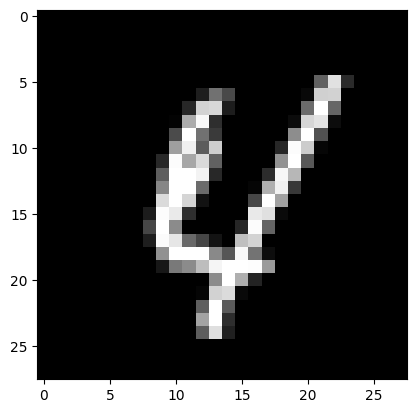

In [ ]:
single_image = X_train[700]
plt.imshow(single_image,cmap='gray')
print("SRIRAM S \n212222240105")

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         147,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,618 (596.16 KB)

 Trainable params: 152,618 (596.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', # Loss function for multi-class classification
              optimizer='adam', # A popular optimization algorithm
              metrics=['accuracy']) # Metric to evaluate model performance

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.8657 - loss: 0.4531 - val_accuracy: 0.9792 - val_loss: 0.0681
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 73ms/step - accuracy: 0.9802 - loss: 0.0662 - val_accuracy: 0.9823 - val_loss: 0.0526
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - accuracy: 0.9858 - loss: 0.0451 - val_accuracy: 0.9863 - val_loss: 0.0443
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 76ms/step - accuracy: 0.9898 - loss: 0.0314 - val_accuracy: 0.9853 - val_loss: 0.0428
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 73ms/step - accuracy: 0.9918 - loss: 0.0266 - val_accuracy: 0.9844 - val_loss: 0.0493


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.938467,0.209767,0.9792,0.068109
1,0.981233,0.063510,0.9823,0.052624
2,0.986050,0.045248,0.9863,0.044325
3,0.989233,0.033627,0.9853,0.042802
4,0.991950,0.026127,0.9844,0.049264


SRIRAM S 
212222240105


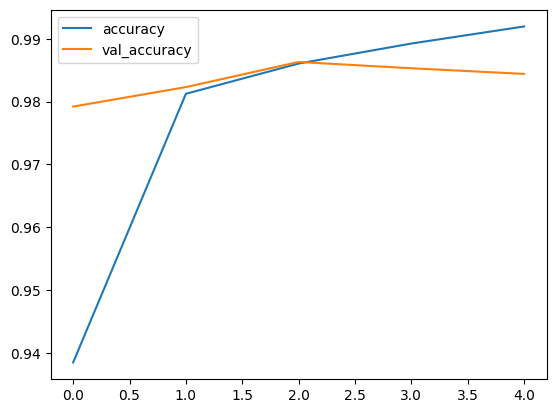

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
print("SRIRAM S \n212222240105")

SRIRAM S 
212222240105


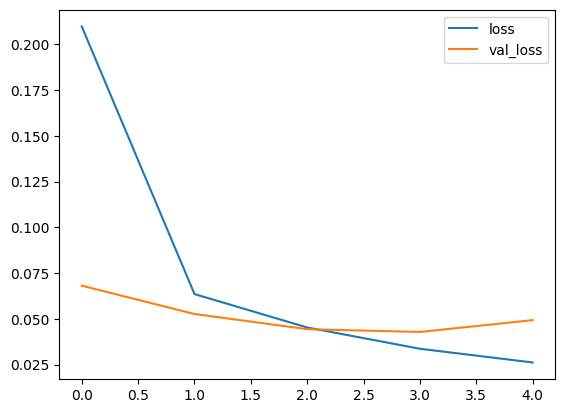

In [ ]:
metrics[['loss','val_loss']].plot()
print("SRIRAM S \n212222240105")

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))
print("SRIRAM S \n212222240105")

[[ 972    0    2    1    0    1    4    0    0    0]
 [   0 1130    2    0    0    0    3    0    0    0]
 [   1    5 1022    0    1    0    0    3    0    0]
 [   0    0    2  998    0    9    0    0    1    0]
 [   0    0    1    0  975    0    4    0    0    2]
 [   1    0    0    4    0  886    1    0    0    0]
 [   3    2    0    0    1    7  945    0    0    0]
 [   0    3   16    1    1    1    0 1001    1    4]
 [   5    0    4    2    2    8    2    1  948    2]
 [   2    2    0    4   11   13    0    5    5  967]]
SRIRAM S 
212222240105


In [ ]:
print(classification_report(y_test,x_test_predictions))
print("SRIRAM S \n212222240105")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.96      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

SRIRAM S 
212222240105


In [ ]:
img = image.load_img('imagefour.png')

In [ ]:
type(img)


PIL.Image.Image

In [ ]:
img = image.load_img('imagefour.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
print(x_single_prediction)

[6]


SRIRAM S 
212222240105


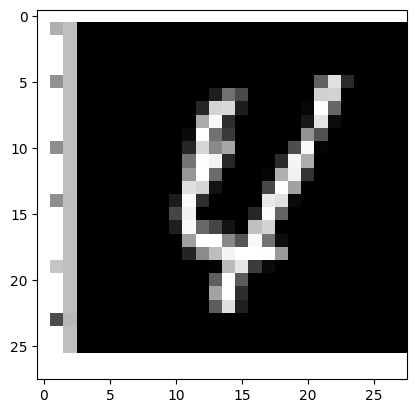

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("SRIRAM S \n212222240105")

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
print(x_single_prediction)

[6]
